# Extract optic flow timecourses for all 10 HCP movies

In [7]:
# packages essential to run 3_1_2 and 3_1_1
#!pip install pliers
#!pip install opencv-python

  Using cached opencv_python-4.5.5.62-cp36-abi3-macosx_10_15_x86_64.whl (46.0 MB)


In [5]:
import imageio
# imageio.plugins.ffmpeg.download()
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pliers
import cv2
%matplotlib inline

import os

from pliers.extractors import FarnebackOpticalFlowExtractor
from pliers.stimuli import VideoStim



In [3]:
vid_names = ['COAXING-B', 'BILLIARD-A', 'DRIFTING-A', 'Fishing', 'RandomMechanical', 'Scaring','SEDUCING-B','STAR-A','SURPRISING-B','TENNIS-A']

In [24]:
for vid_name in vid_names[2:]:

    print(vid_name)
    #vid_name = 'BILLIARD-A'#'COAXING-B'

    video = VideoStim('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/social_stimuli/SOCIAL Stimuli/mp4/hcp10/' + vid_name + '.mp4')

    optflow_ext = FarnebackOpticalFlowExtractor()
    optflow_result = optflow_ext.transform(video)
    result_df = optflow_result.to_df()
    
    result_df.to_csv('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/social_stimuli/SOCIAL Stimuli/mp4/hcp10/csv/OptflowExtractor_' + vid_name + '.csv', index = False)

DRIFTING-A
Fishing
RandomMechanical
Scaring
SEDUCING-B
STAR-A
SURPRISING-B
TENNIS-A


## Plot coaxing vs. billiards

In [25]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'



In [27]:
vid_names = ['COAXING-B','BILLIARD-A']

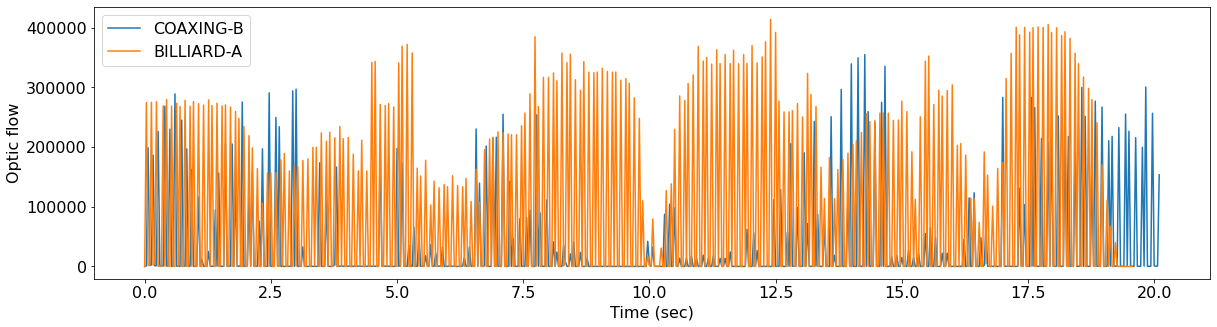

In [28]:
plt.figure(1,figsize=(20,5))
for i,vid_name in enumerate(vid_names):
    result_df = pd.read_csv('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/social_stimuli/SOCIAL Stimuli/mp4/hcp10/csv/OptflowExtractor_' + vid_name + '.csv')
    #plt.subplot(2,1,i+1)
    plt.plot(result_df.onset,result_df.total_flow,label=vid_name)
    plt.xlabel('Time (sec)')
    plt.ylabel('Optic flow')
    #plt.ylim(0,400000)

plt.legend()



In [6]:
result_df.head()

,order,duration,onset,object_id,total_flow
0,NaN,0.033333,0.000000,0,22.518429
1,NaN,0.033333,0.033333,0,274590.750000
2,NaN,0.033333,0.066667,0,1992.793000
3,NaN,0.033333,0.100000,0,1586.565800
4,NaN,0.033333,0.133333,0,275026.880000


In [36]:
result_df.loc[result_df['onset']==3.,5,:]

,order,duration,onset,object_id,total_flow
150,NaN,0.033333,5.0,0,312.8297


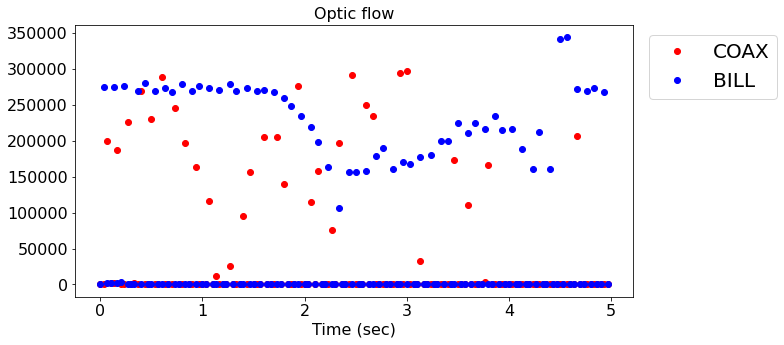

In [49]:
plt.figure(1,figsize=(10,5))
plt.plot(result_df.onset[:150],tc1,ls='None',marker = 'o',color='red', label ='COAX')
plt.plot(result_df.onset[:150],tc2,ls='None',marker = 'o',color='blue', label='BILL')
plt.xlabel('Time (sec)')
plt.title('Optic flow')
plt.legend(bbox_to_anchor=[1.01,1],fontsize=20)